In [1]:
#Machine Learing Projet
#importing importent libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
your_local_path="F:/10 desktop/UPx/machine learning/attachment_Project/Loan Payment-20180209T141551Z-001/Loan Payment/"
print(your_local_path)

F:/10 desktop/UPx/machine learning/attachment_Project/Loan Payment-20180209T141551Z-001/Loan Payment/


In [3]:
loan_data=pd.read_csv(your_local_path+'Loan payments data.csv')
loan_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
loan_data=loan_data.fillna('0')
loan_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female


In [5]:
#analysing the data and check how various variables are contributing to the loan status
#loan_data.plot=(kind='scatter',x='Gender',y='loan_status')

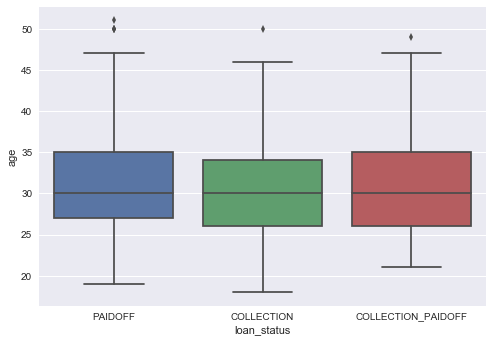

In [6]:
sns.boxplot(x='loan_status', y='age', data=loan_data)
plt.show()

In [7]:
#converting catagorical features into numeric data:
education_dummies=pd.get_dummies(loan_data.education, prefix='education')
education_dummies.drop(education_dummies.columns[3], axis=1, inplace=True)
education_dummies.head()

,education_Bechalor,education_High School or Below,education_Master or Above
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [8]:
gender_dummies=pd.get_dummies(loan_data.Gender, prefix='Gender')
gender_dummies.drop(gender_dummies.columns[1], axis=1, inplace=True)
gender_dummies.head()

,Gender_female
0,0
1,1
2,1
3,0
4,1


In [9]:
#converting catagorical data into numeric data
loan_status_dummies= pd.get_dummies(loan_data.loan_status, prefix='loan_status')
loan_status_dummies.head()

,loan_status_COLLECTION,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
#adding the encoded variable to the table
loan_data=pd.concat([loan_data,education_dummies,gender_dummies,loan_status_dummies], axis=1)
loan_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,education_Bechalor,education_High School or Below,education_Master or Above,Gender_female,loan_status_COLLECTION,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male,0,1,0,0,0,0,1
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female,1,0,0,1,0,0,1
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female,1,0,0,1,0,0,1
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male,0,0,0,0,0,0,1
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female,0,0,0,1,0,0,1


In [11]:
loan_data.drop(['Loan_ID','loan_status','education','Gender'], axis=1, inplace=True)
loan_data.head()

,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education_Bechalor,education_High School or Below,education_Master or Above,Gender_female,loan_status_COLLECTION,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF
0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,0,1,0,0,0,0,1
1,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,1,0,0,1,0,0,1
2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,1,0,0,1,0,0,1
3,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,0,0,0,0,0,0,1
4,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,0,0,0,1,0,0,1


In [12]:
feature_col=['Principal', 'terms', 'age', 'education_Bechalor', 'education_High School or Below','education_Master or Above','Gender_female','past_due_days']
lable_col=['loan_status_COLLECTION_PAIDOFF', 'loan_status_PAIDOFF', 'loan_status_COLLECTION']
X= loan_data[feature_col]
y=loan_data[lable_col]
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30)


C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(350, 8)
(150, 8)
(350, 3)
(150, 3)


In [14]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#logreg = LogisticRegression(C=.1)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
logreg=OneVsRestClassifier(LogisticRegression(C=0.1))
logreg.fit(xTrain, yTrain)

OneVsRestClassifier(estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [15]:
y_log_pred_test = logreg.predict(xTest)
#y_log_pred_train = logreg.predict(xTrain)

In [16]:
from sklearn import metrics
metrics.accuracy_score(yTest, y_log_pred_test)

0.83333333333333337

In [17]:
metrics.accuracy_score(yTrain, y_log_pred_train)

0.77142857142857146

In [20]:
#lets check how SVM performs
from sklearn.svm import SVC
logreg_SVM=OneVsRestClassifier(SVC(random_state=0))
logreg_SVM.fit(xTrain, yTrain)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [21]:
y_log_pred_test_SVM = logreg_SVM.predict(xTest)
#y_log_pred_train_SVM = logreg_SVM.predict(xTrain)

In [22]:
from sklearn import metrics
metrics.accuracy_score(yTest, y_log_pred_test_SVM)

0.8666666666666667

In [23]:
metrics.accuracy_score(yTrain, y_log_pred_train_SVM)

0.97142857142857142